In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment 

In [4]:
N = 100
tetha = 3
np.random.seed(42)
X = np.random.randint(tetha, 2 * tetha, N)
tetha_estimate = 2 / 3 * (np.sum(X) / N)

Интервал, посчитанный точным методом

In [5]:
a = 0.05

left0 = np.max(X) / (1 + (1 - a / 2) ** (1 / N))
right0 = np.max(X) / (1 + (a / 2) ** (1 / N))
print("Интервал (точный метод): ", "(", left0, ',', right0, ')')
print("Размах = ", right0 - left0)

Интервал (точный метод):  ( 2.5003164725981133 , 2.5461057649659415 )
Размах =  0.04578929236782825


In [ ]:
XX = X ** 2
left1 = -1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate
right1 = 1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(XX) - (0.01 * np.sum(X)) ** 2) + tetha_estimate
print(f"Асимптотический интервал: ({left1}, {right1})")
print(f"Размах = {right1 - left1}")

Асимптотический интервал: ( 2.5488326717724292 ,  2.7578339948942374 )
Размах =  0.2090013231218082


In [7]:
M = np.array([])
for i in range(1000):
    M = np.append(M, 2 / 3 * np.mean(np.random.choice(X, size = len(X))) - 2 / 3 * np.mean(X))

M = np.sort(M)

left2 = 2 / 3 * np.mean(X) + M[24]
right2 = 2 / 3 * np.mean(X) + M[974]

print("Бутстраопвский интервал: [", left2, ', ', right2, ']')
print("Размах = ", right2 - left2)

Бутстраопвский интервал: [ 2.5533333333333332 ,  2.76 ]
Размах =  0.20666666666666655


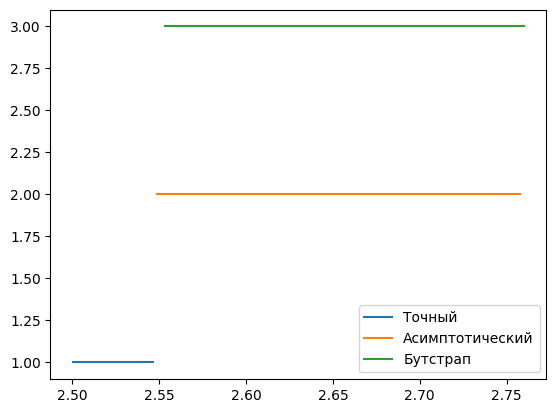

In [8]:
x1 = np.linspace(left0, right0, 100)
y1 = [1] * 100

x2 = np.linspace(left1, right1, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.legend(["Точный", "Асимптотический", "Бутстрап"])

plt.show()